A1.

In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

data = pd.read_excel('/content/Lab Session Data.xlsx',sheet_name = 'marketing_campaign')

X = data[['Recency']]
y = data['MntWines']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression().fit(X_train, y_train)

y_train_pred = reg.predict(X_train)

print(y_train_pred)


[295.17802413 291.84987778 296.9296801  ... 298.33100488 290.27338741
 299.03166727]


A2.

In [9]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mape = np.mean(np.abs((y_train - y_train_pred) / (y_train + 1e-10))) * 100  # Avoid division by zero
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mape = np.mean(np.abs((y_test - y_test_pred) / (y_test + 1e-10))) * 100  # Avoid division by zero
test_r2 = r2_score(y_test, y_test_pred)


print("  Mean Squared Error (MSE): ",train_mse)
print("  Root Mean Squared Error (RMSE): ",train_rmse)
print("  Mean Absolute Percentage Error (MAPE): ",train_mape)
print("  R² Score: train_r2")

print("  Mean Squared Error (MSE): ",test_mse)
print("  Root Mean Squared Error (RMSE): ",test_rmse)
print("  Mean Absolute Percentage Error (MAPE): ",test_mape)
print("  R² Score: test_r2")



  Mean Squared Error (MSE):  111838.37713821037
  Root Mean Squared Error (RMSE):  334.42245310117914
  Mean Absolute Percentage Error (MAPE):  1484140644707.597
  R² Score: train_r2
  Mean Squared Error (MSE):  119118.86812161304
  Root Mean Squared Error (RMSE):  345.1360139446665
  Mean Absolute Percentage Error (MAPE):  2671880575360.961
  R² Score: test_r2


A3.

In [12]:
X = data[['Recency','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts']]
y = data['MntWines']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression().fit(X_train, y_train)

y_train_pred = reg.predict(X_train)

y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mape = np.mean(np.abs((y_train - y_train_pred) / (y_train + 1e-10))) * 100  # Avoid division by zero
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mape = np.mean(np.abs((y_test - y_test_pred) / (y_test + 1e-10))) * 100  # Avoid division by zero
test_r2 = r2_score(y_test, y_test_pred)


print("  Mean Squared Error (MSE): ",train_mse)
print("  Root Mean Squared Error (RMSE): ",train_rmse)
print("  Mean Absolute Percentage Error (MAPE): ",train_mape)
print("  R² Score: train_r2")

print("  Mean Squared Error (MSE): ",test_mse)
print("  Root Mean Squared Error (RMSE): ",test_rmse)
print("  Mean Absolute Percentage Error (MAPE): ",test_mape)
print("  R² Score: test_r2")




  Mean Squared Error (MSE):  74516.95253208917
  Root Mean Squared Error (RMSE):  272.9779341486948
  Mean Absolute Percentage Error (MAPE):  752096781874.0776
  R² Score: train_r2
  Mean Squared Error (MSE):  79950.22813881791
  Root Mean Squared Error (RMSE):  282.75471373403826
  Mean Absolute Percentage Error (MAPE):  1314845194582.3955
  R² Score: test_r2


A4.

In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X_train)
print(kmeans.labels_)
print(kmeans.cluster_centers_)

[0 0 0 ... 0 0 0]
[[ 47.91316334  16.81943487  72.10130944  23.44589938  17.46381806]
 [ 50.62756598  68.08504399 571.79178886  97.09090909  67.59530792]]


A5.

In [15]:
from sklearn.metrics import silhouette_score ,calinski_harabasz_score, davies_bouldin_score
print(" Silhouette Score : ", silhouette_score(X_train, kmeans.labels_))
print("  CH Score : ",calinski_harabasz_score(X_train, kmeans.labels_))
print("  DB Index : ",davies_bouldin_score(X_train, kmeans.labels_) )

 Silhouette Score :  0.6917579301999274
  CH Score :  3622.614883945355
  DB Index :  0.5684309546276658


A6.

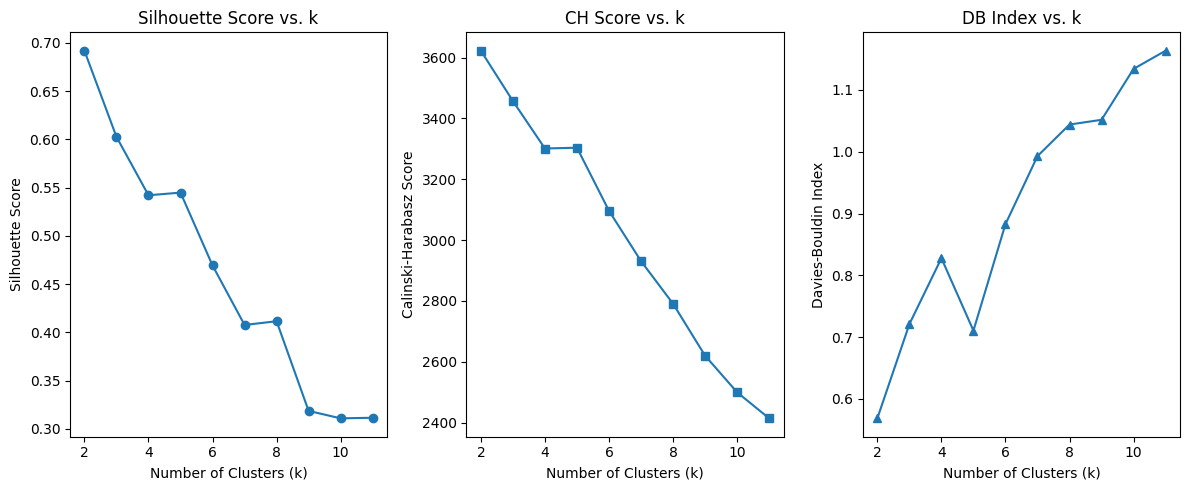

In [16]:
import matplotlib.pyplot as plt



silhouette_scores = []
ch_scores = []
db_scores = []
k_values = range(2,12)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_train)
    labels = kmeans.labels_

    # Calculate evaluation metrics
    silhouette_scores.append(silhouette_score(X_train, labels))
    ch_scores.append(calinski_harabasz_score(X_train, labels))
    db_scores.append(davies_bouldin_score(X_train, labels))

# Plot results
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. k")

plt.subplot(1, 3, 2)
plt.plot(k_values, ch_scores, marker='s', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Calinski-Harabasz Score")
plt.title("CH Score vs. k")

plt.subplot(1, 3, 3)
plt.plot(k_values, db_scores, marker='^', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Davies-Bouldin Index")
plt.title("DB Index vs. k")

plt.tight_layout()
plt.show()

A7.

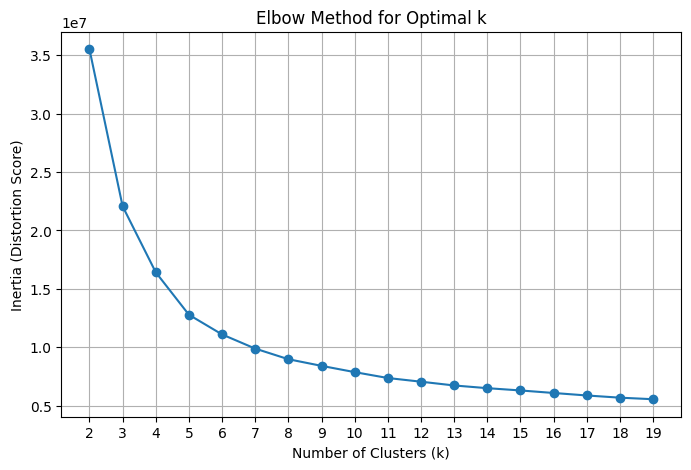

In [17]:

distortions = []

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_train)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 20), distortions, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Distortion Score)")
plt.title("Elbow Method for Optimal k")
plt.xticks(range(2, 20))
plt.grid(True)
plt.show()